# Challenge Set 4 (Linear Learning)¶

Topic: 

Date: 01/22/2016

Name: Kenneth Myers

Worked with: NA

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import math
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error

%matplotlib inline

## Challenge 1

In [57]:
B0 = random.random()*10
B1 = random.random()*10

f = np.random.randn(1000)*1000
x = np.random.choice(np.arange(1,100000), 1000) + f
e = np.random.randn(1000)
y = B0 + B1*np.log(x) + e

In [58]:
#print(log_data)

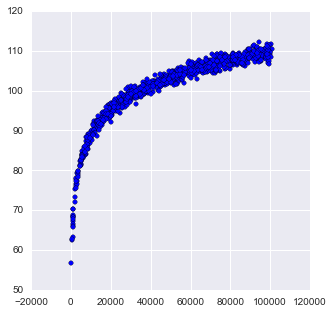

In [59]:
plt.figure(figsize=(5,5))
plt.scatter(x,y, marker='o')

#plt.xscale('log')

### Quadratic fit

In [60]:
log_data = pd.DataFrame({'y':y, 'x':x, 'x2': np.power(x,2)})
log_data = log_data.dropna()
#log_data['const'] = [1 for i in range(len(x))] <---- no need for this line when working with smf.ols

In [61]:
def getQuadModel(data):
    model = smf.ols(formula='y ~ np.square(x) + x', data=data)
    results = model.fit()
    return results

In [62]:
def getPlot(results, title, ylabel='Y', xlabel='X', var=1):
    sm.graphics.plot_fit(results, var)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)

In [63]:
quad_fit = getQuadModel(log_data)

In [64]:
quad_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     4520.
Date:                Mon, 01 Feb 2016   Prob (F-statistic):               0.00
Time:                        12:03:23   Log-Likelihood:                -2399.0
No. Observations:                 999   AIC:                             4804.
Df Residuals:                     996   BIC:                             4819.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept       80.3550      0.266    301.617      0.000        79.832    80.878
np.square(x) -4.152e-09   1.13e-10    -36.623      0.000     -4.37e-09 -3.93e-09
x                0.0007   1.19e-05     57.322      0.000         0.001     0.001
==============================================================================
Omnibus:                      692.052   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13886.067
Skew:                          -2.902   Prob(JB):                         0.00
Kurtosis:                      20.318   Cond. No.                     1.43e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

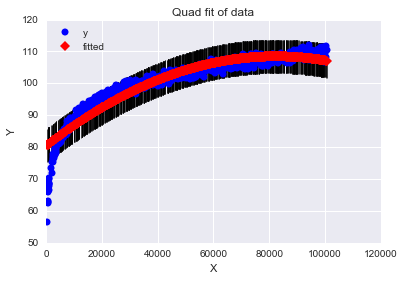

In [65]:
getPlot(quad_fit, title='Quad fit of data', var=2)

In [66]:
log_data = sm.tools.tools.add_constant(log_data)
log_data.head()

,const,x,x2,y
0,1,30266.284834,9.160480e+08,98.703464
1,1,15864.449077,2.516807e+08,92.223378
2,1,9115.980744,8.310110e+07,87.105496
3,1,36633.832371,1.342038e+09,99.941070
4,1,38748.121553,1.501417e+09,101.651037


### Log fit

In [67]:
def getLogModel(data):
    model = smf.ols(formula='y ~ np.log(x)', data=data)
    results = model.fit()
    return results

In [68]:
log_fit = getLogModel(log_data)

In [69]:
log_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                 6.967e+04
Date:                Mon, 01 Feb 2016   Prob (F-statistic):               0.00
Time:                        12:03:24   Log-Likelihood:                -1424.6
No. Observations:                 999   AIC:                             2853.
Df Residuals:                     997   BIC:                             2863.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      5.0724      0.365     13.895      0.000         4.356     5.789
np.log(x)      9.0855      0.034    263.952      0.000         9.018     9.153
==============================================================================
Omnibus:                        0.617   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.735   Jarque-Bera (JB):                0.703
Skew:                          -0.033   Prob(JB):                        0.704
Kurtosis:                       2.888   Cond. No.                         122.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

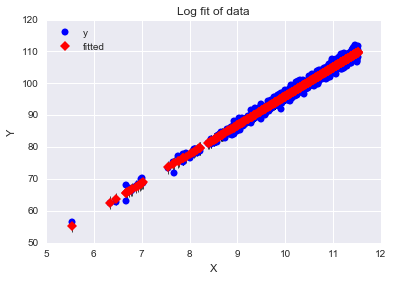

In [70]:
getPlot(log_fit, title='Log fit of data', var=1)

This seems accurate, the fit seems to match the data.

## Challenge 2

In [71]:
np.random.seed(101)

B0 = random.random()*10
B1 = random.random()*10
B2 = random.random()*10

f = np.random.randn(1000)
x = np.random.choice(np.arange(1,10), 1000)*f
e = random.random()*3*np.random.choice(range(200), 1000)
y = B0 + B1*x + B2*np.square(x) + e


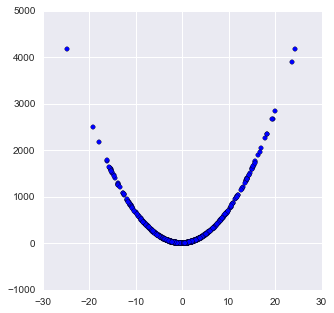

In [72]:
plt.figure(figsize=(5,5))
plt.scatter(x,y, marker='o')


In [73]:
quad_data = pd.DataFrame({'x':x,'y':y,'x2':np.square(x)})

In [74]:
quad_data = sm.add_constant(quad_data)

In [75]:
train, test = train_test_split(quad_data, test_size = 0.25)

In [76]:
quad_fit_2 = getQuadModel(train)

In [77]:
quad_fit_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.277e+07
Date:                Mon, 01 Feb 2016   Prob (F-statistic):               0.00
Time:                        12:03:25   Log-Likelihood:                -1757.9
No. Observations:                 750   AIC:                             3522.
Df Residuals:                     747   BIC:                             3536.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept        4.4344      0.104     42.801      0.000         4.231     4.638
np.square(x)     6.9082      0.001   4875.090      0.000         6.905     6.911
x                2.6236      0.016    160.671      0.000         2.592     2.656
==============================================================================
Omnibus:                      623.612   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.738
Skew:                          -0.023   Prob(JB):                     7.10e-11
Kurtosis:                       1.778   Cond. No.                         84.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

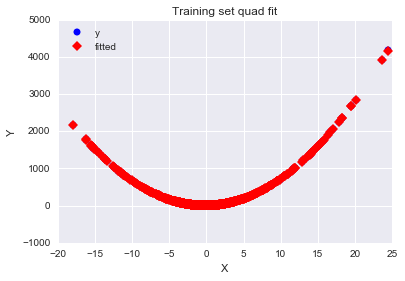

In [78]:
getPlot(quad_fit_2, title='Training set quad fit', var = 2)

In [79]:
test.head()

,const,x,x2,y
865,1,-0.230439,0.053102,3.768871
460,1,1.323162,1.750757,22.466827
727,1,-1.280880,1.640652,11.313525
293,1,4.115243,16.935222,130.833418
118,1,4.699896,22.089025,166.435132


In [80]:
def quadPlotTest(results, train, test, dpdnt='y', indp1='x', indp2='x2', const='const'):
    test = test.sort_values(by=indp1, ascending=True)
    plt.scatter(train[indp1], train[dpdnt], label='Training', color = 'red')
    plt.plot(test[indp1], results.predict(test[[const, indp2, indp1]]), color='black',linewidth=1, label='Test')
    plt.xlabel(indp1)
    plt.ylabel(dpdnt)
    plt.legend(loc='upper left')
    plt.title('Training and Testing Data')

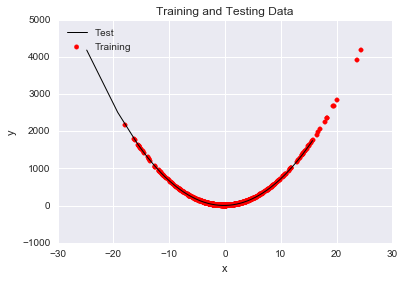

In [81]:
quadPlotTest(quad_fit_2, train, test)

### MSE Calculations

##### Training 

In [82]:
mean_squared_error(train.y, quad_fit_2.predict(train[['const', 'x', 'x2']]))

6.3581213385757538

##### Testing 

In [83]:
mean_squared_error(test.y, quad_fit_2.predict(test[['const', 'x', 'x2']]))

6.4141695213924264

## Challenge 3 

For the data from two (above), try polynomial fits from 0th (just constant) 

to 7th order (highest term x^7). Over the x axis of model degree (8 points), plot

**training error**

**test error**

**R squared**

**AIC**




In [84]:
def getPolyModel(data, i):
    formula = 'y ~ 1'
    for num in range(i):
        formula += (' + np.power(x,' + str(num+1) + ')')
    
    #print(formula)
    
    model = smf.ols(formula=formula, data=data)
    results = model.fit()
    return results

In [85]:
def iterQuadDataPolyModel(quad_data, numIter):
    train_list = []
    test_list = []
    Rsq_list = []
    AIC_list = []
    
    np.random.seed(101)

    B0 = random.random()*10
    B1 = random.random()*10
    B2 = random.random()*10

    f = np.random.randn(1000)
    x = np.random.choice(np.arange(1,10), 1000)*f
    e = random.random()*3*np.random.choice(range(200), 1000)
    y = B0 + B1*x + B2*np.square(x) + e
    
    quad_data = pd.DataFrame({'x':x,'y':y,'x2':np.square(x)})
    quad_data = sm.add_constant(quad_data)
    train, test = train_test_split(quad_data, test_size = 0.25)
    
    for i in range(numIter):
        temp_result = getPolyModel(train, i)
        
        train_list.append(mean_squared_error(train.y, temp_result.predict(train[['const', 'x', 'x2']])))
        test_list.append(mean_squared_error(test.y, temp_result.predict(test[['const', 'x', 'x2']])))
        Rsq_list.append(temp_result.rsquared)
        AIC_list.append(temp_result.aic)
        
    c3_df = pd.DataFrame({'Train_MSE':train_list, 'Test_MSE':test_list, 'Rsquared':Rsq_list, 'AIC':AIC_list})
    return c3_df

In [86]:
c3_df = iterQuadDataPolyModel(quad_data, 8)

In [87]:
c3_df

,AIC,Rsquared,Test_MSE,Train_MSE
0,10653.886462,-2.220446e-16,75257.780491,86218.341810
1,10533.165507,1.509421e-01,87509.909952,73204.361084
2,9459.056694,7.977882e-01,17588.052396,17434.364788
3,9460.386863,7.979687e-01,17683.733110,17418.800969
4,9462.348727,7.979790e-01,17790.051837,17417.915295
5,9463.472130,7.982150e-01,17455.716576,17397.569183
6,9465.471811,7.982151e-01,17474.618280,17397.561789
7,9467.246173,7.982758e-01,20592.834000,17392.328500


In [88]:
def plotC3(yvalue):
    c3_df.plot(c3_df.index, yvalue)
    plt.xlabel('Polynomial Order')
    plt.ylabel(yvalue)
    plt.title(yvalue + ' for each Polynomial Order')

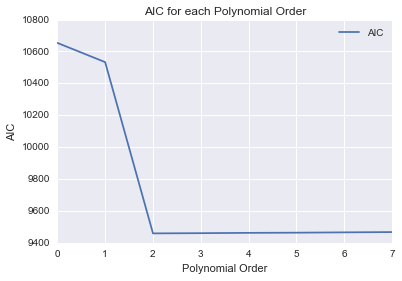

In [89]:
plotC3('AIC')

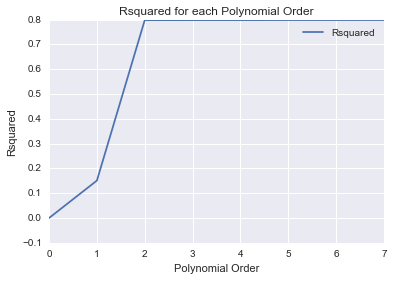

In [90]:
plotC3('Rsquared')

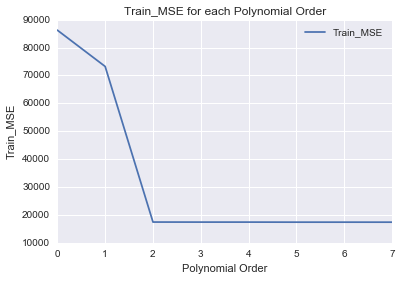

In [91]:
plotC3('Train_MSE')

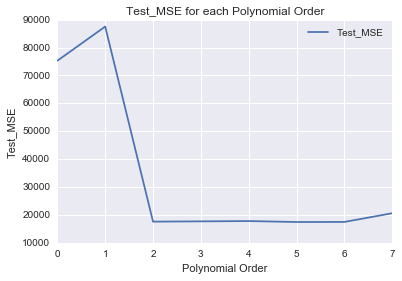

In [92]:
plotC3('Test_MSE')

## Challenge 4

In [93]:
def iterQuadDataByDataSize():
    train_list = []
    test_list = []
    training_size = []
    
    np.random.seed(101)

    B0 = random.random()*10
    B1 = random.random()*10
    B2 = random.random()*10

    f = np.random.randn(1000)
    x = np.random.choice(np.arange(1,10), 1000)*f
    e = random.random()*3*np.random.choice(range(200), 1000)
    y = B0 + B1*x + B2*np.square(x) + e
    
    quad_data = pd.DataFrame({'x':x,'y':y,'x2':np.square(x)})
    quad_data = sm.add_constant(quad_data)
    
    step_size = 5
    steps = int(len(quad_data)/step_size)
    data_end = 5
    
    for i in range(steps):
        train, test = train_test_split(quad_data[:data_end], test_size = 0.25)
        temp_result = getQuadModel(quad_data)
        
        train_list.append(mean_squared_error(train.y, temp_result.predict(train[['const', 'x', 'x2']])))
        test_list.append(mean_squared_error(test.y, temp_result.predict(test[['const', 'x', 'x2']])))
        training_size.append(len(train))
        
        data_end += step_size
        
        
    c4_df = pd.DataFrame({'Train_MSE':train_list, 'Test_MSE':test_list, 'Training_Size':training_size})
    return c4_df

In [94]:
c4_df = iterQuadDataByDataSize()

In [95]:
c4_df.head()

,Test_MSE,Train_MSE,Training_Size
0,719.775258,588.966252,3
1,762.156797,368.505310,7
2,391.608285,490.683055,11
3,475.819126,421.244081,15
4,169.825431,599.841643,18


In [96]:
def plotC4(df):
    ax = df.plot('Training_Size', 'Train_MSE', label='Train_MSE', figsize=(10,10))
    df.plot('Training_Size', 'Test_MSE', label='Test_MSE', ax=ax)
    plt.xlabel('Training Size')
    plt.ylabel('MSE')
    plt.title('MSE for Trainings and Tests by Training Size')

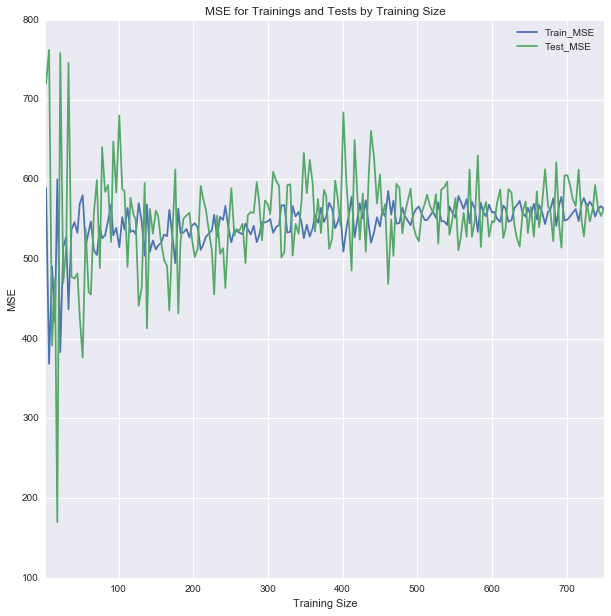

In [97]:
plotC4(c4_df)